In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('online_shopping_dataset.csv')
df

,Customer_ID,Age,Gender,Region,Total_Spent,No_of_Orders,Average_Order_Value,Payment_Method,Returning_Customer,Satisfaction_Rating
0,1,56,Female,East,1628.56,19,85.71,Debit Card,No,2
1,2,37,Female,South,1671.64,12,139.30,COD,Yes,4
2,3,22,Male,North,3649.67,18,202.76,UPI,No,3
3,4,18,Male,West,3754.60,6,625.77,Credit Card,Yes,3
4,5,47,Female,South,1081.76,18,60.10,COD,Yes,5
...,...,...,...,...,...,...,...,...,...,...
95,96,22,Male,South,1712.19,17,100.72,Credit Card,No,1
96,97,28,Female,East,2403.89,17,141.41,Credit Card,No,1
97,98,51,Female,North,3746.97,12,312.25,UPI,Yes,2
98,99,41,Male,North,4371.98,15,291.47,UPI,Yes,3


# 1. How many customers are from each region?

number of customers are from each region
Region
East     28
West     26
South    24
North    22
Name: count, dtype: int64


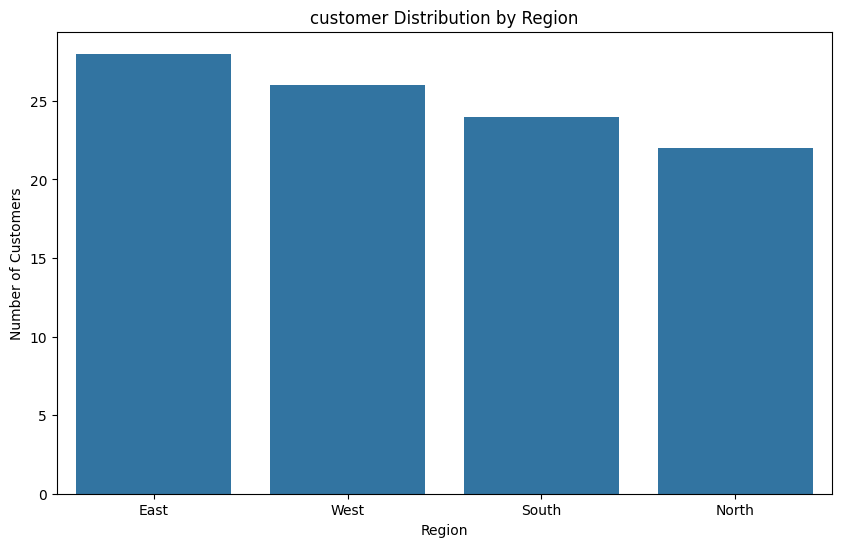

In [3]:
region_counts=df['Region'].value_counts()
print("number of customers are from each region")
print(region_counts)
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Region',order=region_counts.index)
plt.title('customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

OUTPUT: EAST region has the most number of customer than the othe regions (SOUTH,NORTH,WEST),and from EAST=28,WEST=26,NORTH=22,SOUTH=24 CUSTOMERS

# 2. Create a histogram for Total Spent.

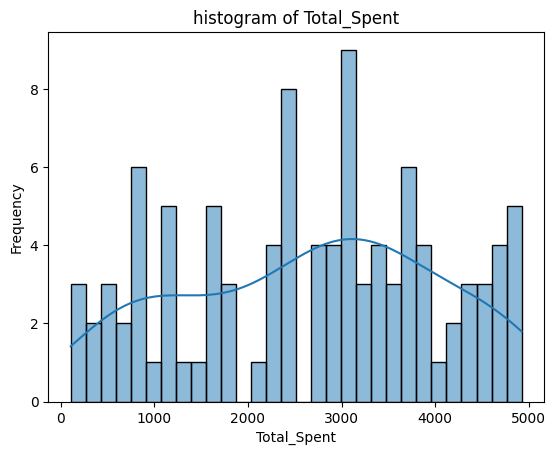

In [4]:
sns.histplot(df['Total_Spent'],bins=30,kde=True)
plt.title('histogram of Total_Spent')
plt.xlabel('Total_Spent')
plt.ylabel('Frequency')
plt.show()

OUTPUT : We have used the histplot function to see the total spent 

# 3. Which gender spends more on average?

In [5]:
df.groupby('Gender')['Total_Spent'].mean().idxmax()

'Male'

OUTPUT:males spends more on average basis

# 4. Use a boxplot to compare Total Spent across Payment Methods.

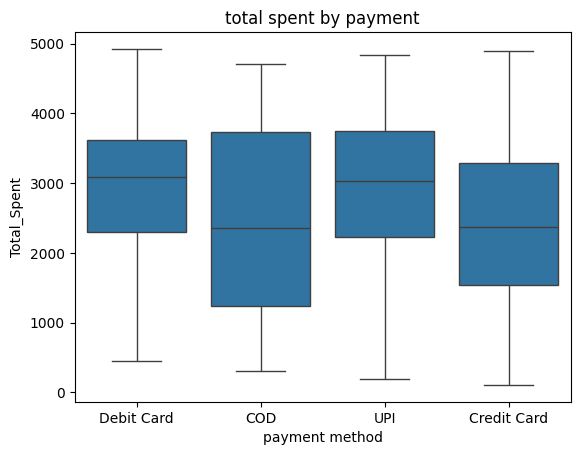

In [6]:
sns.boxplot(data=df,x='Payment_Method',y='Total_Spent')
plt.title('total spent by payment')
plt.xlabel('payment method')
plt.ylabel('Total_Spent')
plt.show()

OUTPUT:

# 5. Show a countplot of Returning vs New Customers.


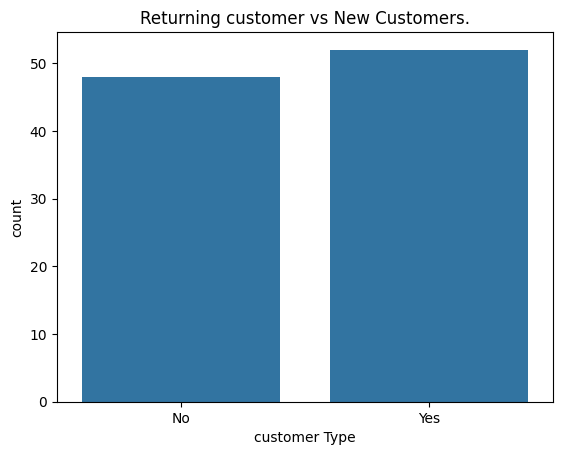

In [7]:
sns.countplot( x='Returning_Customer' ,data=df)
plt.title('Returning customer vs New Customers.')
plt.xlabel('customer Type')
plt.ylabel('count')
plt.show()

OUTPUT:We have used countplot  to show the returning and the New customrs where 

# 6. What is the average order value by payment method?


In [9]:
df.groupby('Payment_Method')['Total_Spent'].mean()

Payment_Method
COD            2448.523636
Credit Card    2458.357200
Debit Card     2852.302500
UPI            2862.745200
Name: Total_Spent, dtype: float64

OUTPUT: Average order value by payment method is UPI,through UPI method most of the order bills are payed

# 7. Use scatter plot for No. of Orders vs Total Spent.

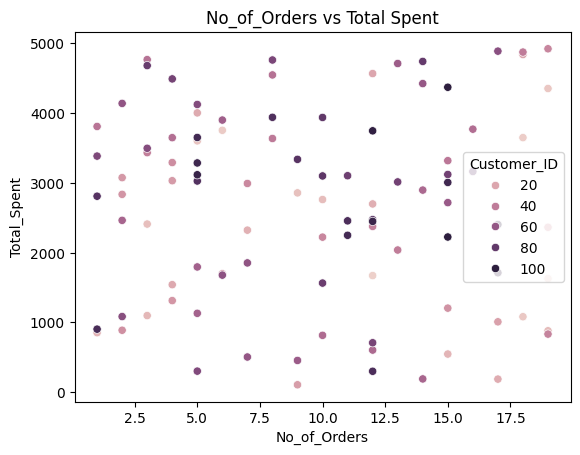

In [10]:
sns.scatterplot(x='No_of_Orders',y='Total_Spent',hue='Customer_ID',data=df)
plt.title('No_of_Orders vs Total Spent')
plt.xlabel('No_of_Orders')
plt.ylabel('Total_Spent')
plt.show()

# 8. What is the distribution of Satisfaction Ratings?


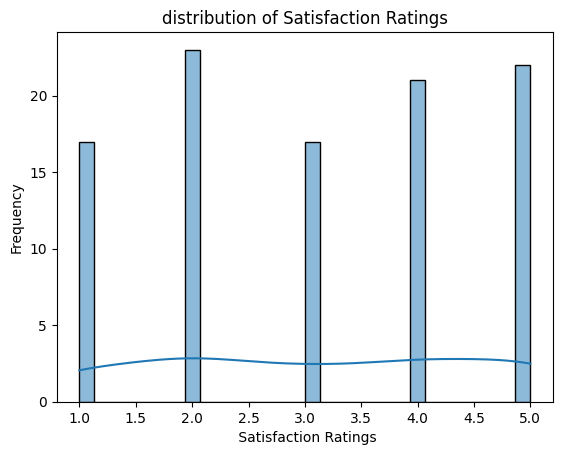

In [11]:
sns.histplot(df['Satisfaction_Rating'],bins=30,kde=True)
plt.title('distribution of Satisfaction Ratings')
plt.xlabel(' Satisfaction Ratings')
plt.ylabel('Frequency')
plt.show()

OUTPUT : This column represents how satisfied the customers were, possibly on a scale of 1 to 5 from low 1 to high 5

# 9. Use heatmap to find correlations between numeric columns.


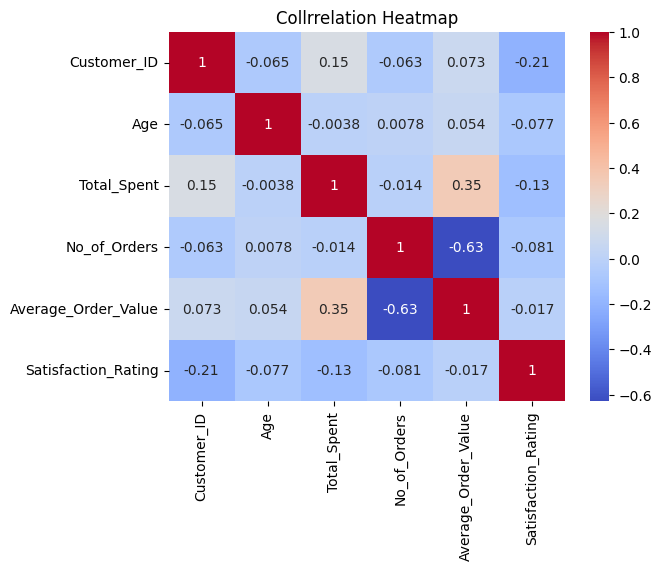

In [12]:
correlation = df.corr(numeric_only =True)
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.title('Collrrelation Heatmap')
plt.show()

OUTPUT : 

# 10. Plot average total spent by age group buckets

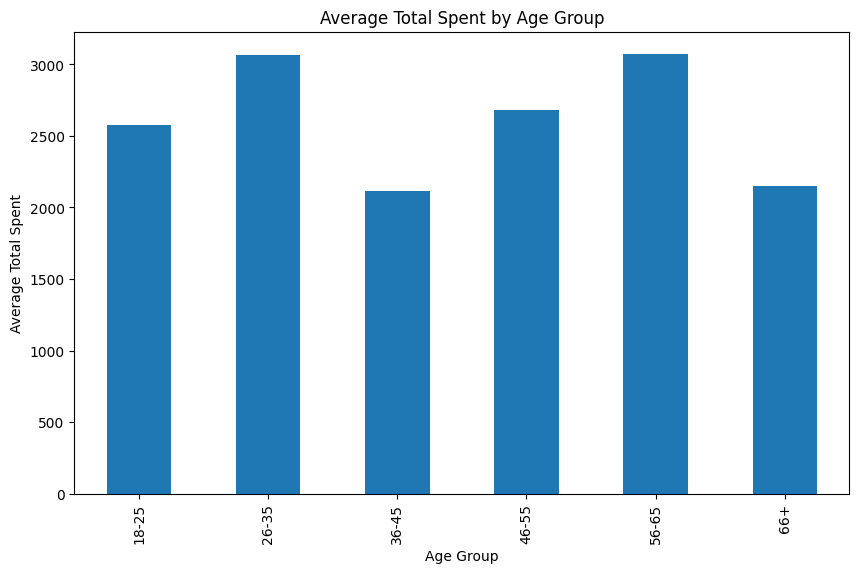

In [17]:
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65, 100], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66+'])
average_spent_age_group = df.groupby('Age_Group', observed=True)['Total_Spent'].mean()
plt.figure(figsize=(10, 6))
average_spent_age_group.plot(kind='bar')
plt.title('Average Total Spent by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Total Spent')
plt.show()

# 11. Which region has the highest average satisfaction rating?

In [38]:
df.groupby('Region')['Satisfaction_Rating'].mean().idxmax()

'West'

In [ ]:
OUTPUT : The highest average satisfsction rating is from the WEST region where customers satisficeses the most

# 12. Create a pie chart of Payment Method distribution.

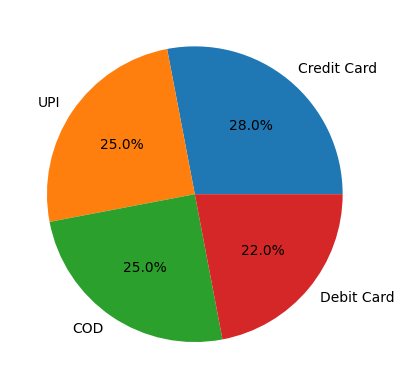

In [9]:
x=df.value_counts('Payment_Method')
mylabel=["Credit Card","UPI","COD","Debit Card"]
plt.pie(x,labels=mylabel,autopct='%1.1f%%')
plt.show()

# 13. Find the customer with the highest total spend.

In [48]:
top_customer = df.loc[df['Total_Spent'].idxmax()]
top_customer

Customer_ID                    35
Age                            51
Gender                     Female
Region                      South
Total_Spent               4923.32
No_of_Orders                   19
Average_Order_Value        259.12
Payment_Method         Debit Card
Returning_Customer             No
Satisfaction_Rating             1
Name: 34, dtype: object

OUTPUT : Customer number 35, who is a female from south region has the highest total spent 

# 14.Compare the number of orders between new and returning customers.


In [53]:
orders_count = df.groupby('Returning_Customer')['No_of_Orders'].sum()
orders_count

Returning_Customer
No     451
Yes    509
Name: No_of_Orders, dtype: int64

In [ ]:
OUTPUT : No → 451 orders were placed by new customers (people who are not returning customers)
        Yes → 509 orders were placed by returning customers (people who have shopped before)

# 15. Plot bar chart of Total Spent across gender and region using hue.

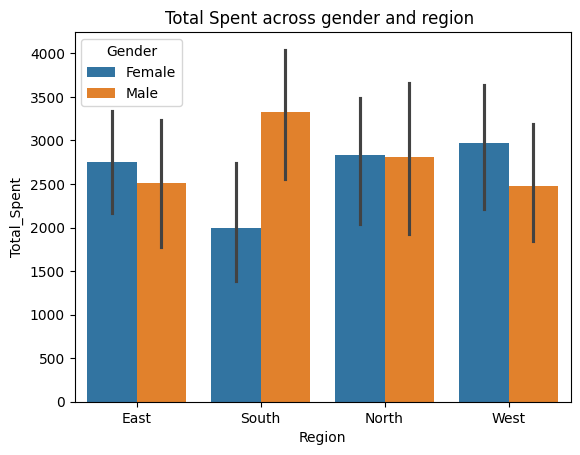

In [56]:
sns.barplot(data=df,x='Region',y='Total_Spent',hue='Gender')
plt.title('Total Spent across gender and region ')
plt.xlabel('Region')
plt.ylabel('Total_Spent')
plt.show()

In [ ]:
OUTPUT: this barchart shows the South region has the biggest gender gap in spending (males spend much more).

In most regions, females either spend more or equal to males — except in the South.

